Heart_disease Prediction by using Machine learning

In [1]:
##importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics



In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Checking for any missing values across the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


luckily, there are no missing values and  299 non-null values in all the attributes. Datatype is also either 'float64' or 'int64' which works well while feeded to an algorithm.

In [4]:
data.shape

(299, 13)

299 rows and 13 columns

In [62]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Features "creatinine_phosphokinase" & "time" are significantly skewed.
All the other features almost shows the normal distribution, since mean is equal to their respective medians.

In [6]:
data["DEATH_EVENT"].unique()

array([1, 0], dtype=int64)

In [7]:
##Checking correlation between columns
print(data.corr()["DEATH_EVENT"].abs().sort_values(ascending=False))

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: DEATH_EVENT, dtype: float64



#This shows that most columns are moderately correlated with DEATH_EVENT, but 'SEX'and ''diabetes' are very weakly correlated

EXPLORATORY DATA ANALYSIS
##First, analysing the target variable

0    203
1     96
Name: DEATH_EVENT, dtype: int64


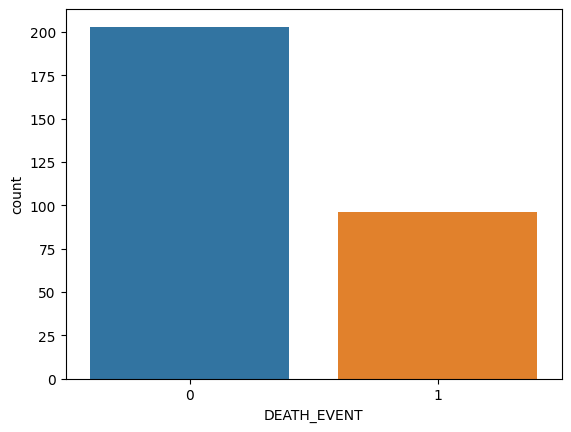

In [8]:
ax = sns.countplot(x= data["DEATH_EVENT"])

target_temp = data.DEATH_EVENT.value_counts()

print(target_temp)



In [9]:
data['smoking'].unique()

array([0, 1], dtype=int64)

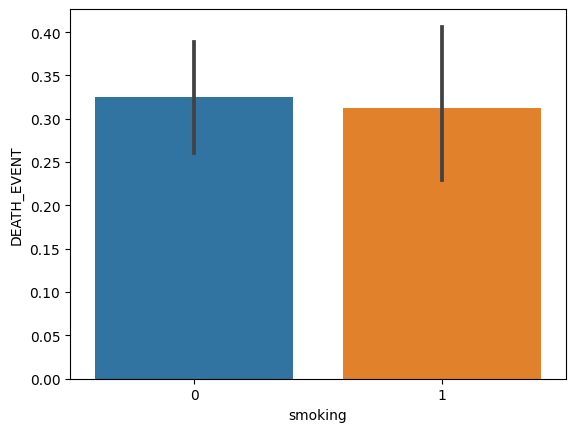

In [10]:
ax = sns.barplot(x= data["smoking"], y= data["DEATH_EVENT"])

In [11]:
data['diabetes'].unique()

array([0, 1], dtype=int64)

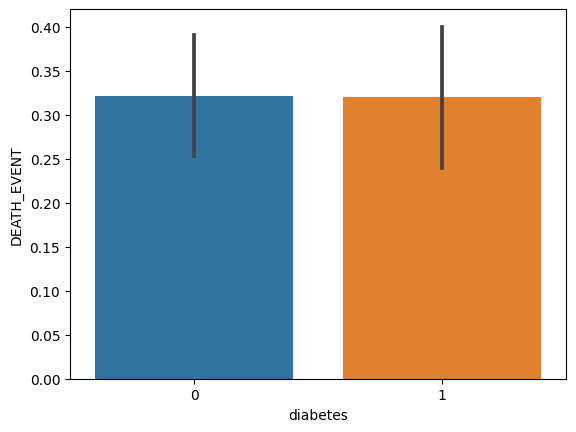

In [12]:
ax = sns.barplot(x= data["diabetes"], y= data["DEATH_EVENT"])

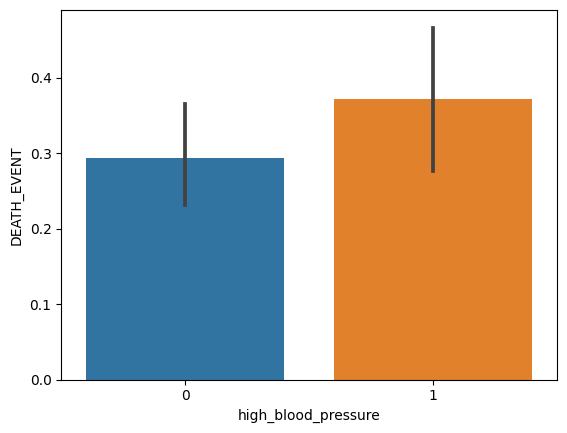

In [13]:

ax = sns.barplot(x= data["high_blood_pressure"], y= data["DEATH_EVENT"])

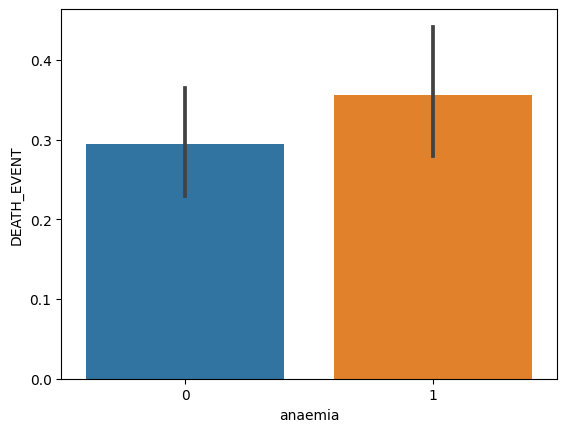

In [14]:
ax = sns.barplot(x= data["anaemia"], y= data["DEATH_EVENT"])

In [15]:
data["sex"].unique()

array([1, 0], dtype=int64)

We notice, that as expected, the 'sex' feature has 2 unique features

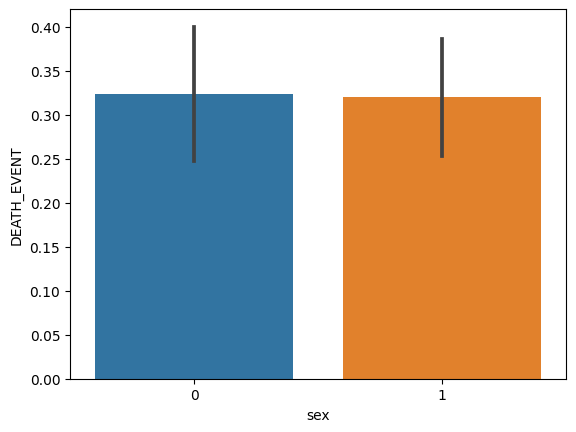

In [16]:
ax = sns.barplot(x= data["sex"], y= data["DEATH_EVENT"])

both male and female are equally affected

#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap

<AxesSubplot: >

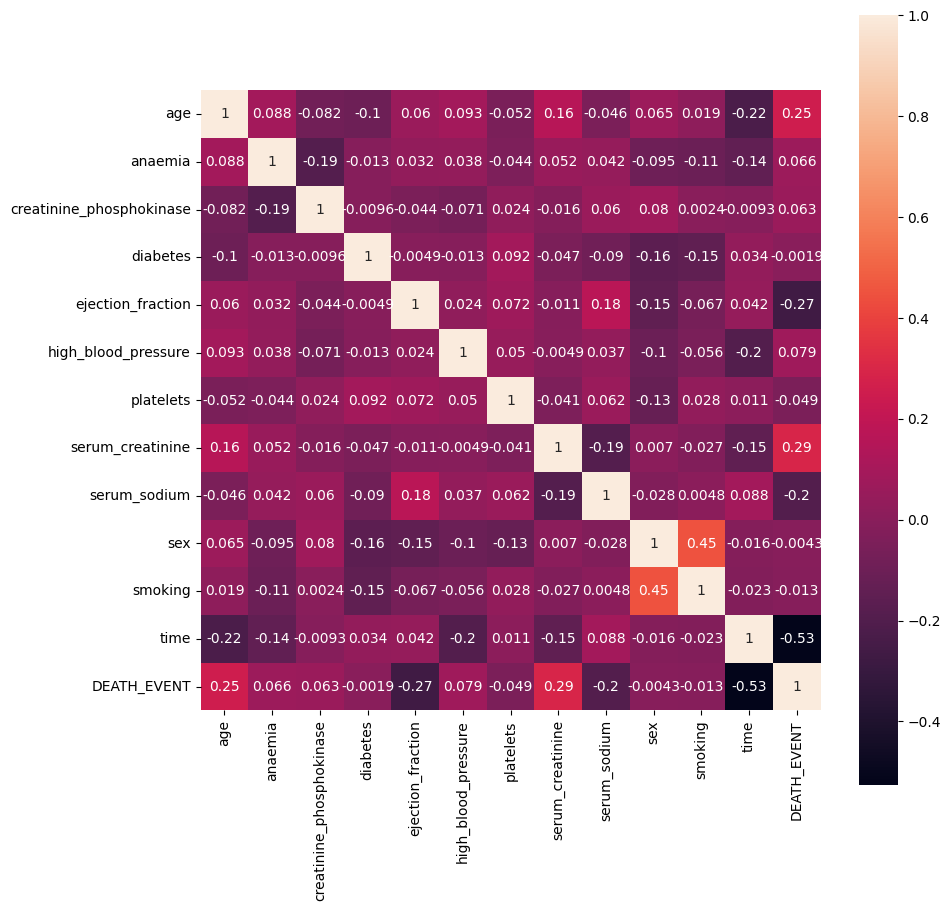

In [17]:
corrmat = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, annot=True, square=True)

"time" is negatively correlated thus makes it the most important feature as it would've been very crucial to get diagnosed early with cardivascular issue so as to get timely treatment thus, reducing the chances of any fatality. 

"serum_sodium" is the next important feature as serum's (essential component of blood) abundancy in blood makes it easier for heart to function.

"ejection_fraction" has also significant influence on target variable which is expected since it is basically the efficiency of the heart.

age has the inverse relation pattern as seen sibce heart's functioning declines with ageing.

Text(0.5, 1.0, 'Death chances distribution Of Age')

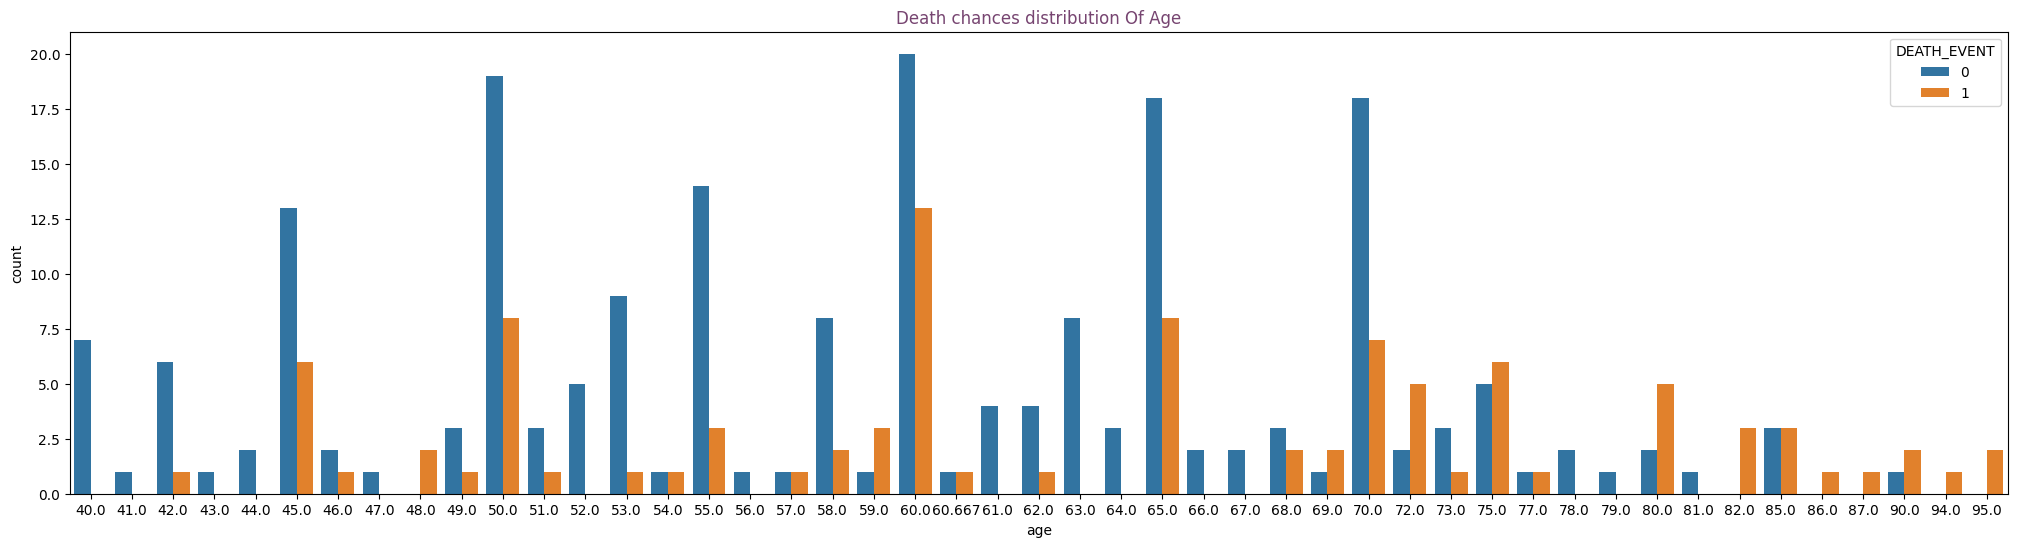

In [18]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(25,6))
com=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT")
com.set_title("Death chances distribution Of Age", color="#774571")

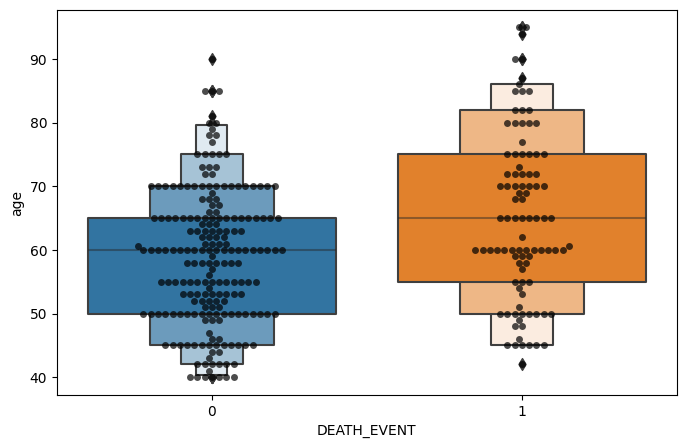

c:\Users\shazi\OneDrive\Desktop\developer academy\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shazi\OneDrive\Desktop\developer academy\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


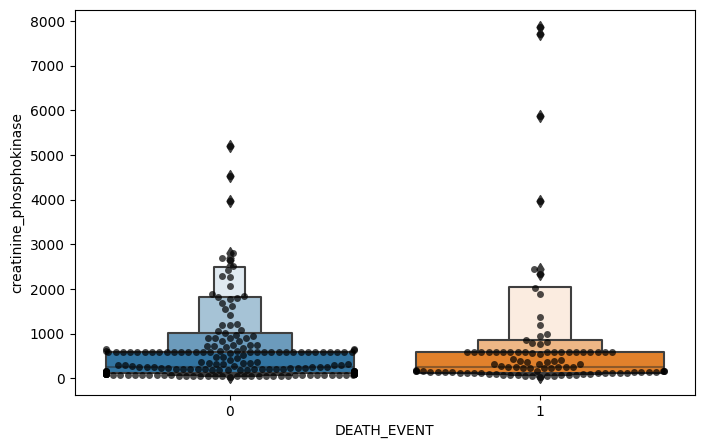

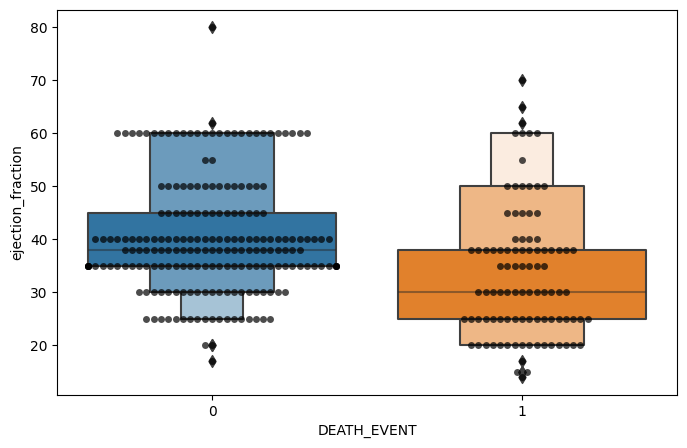

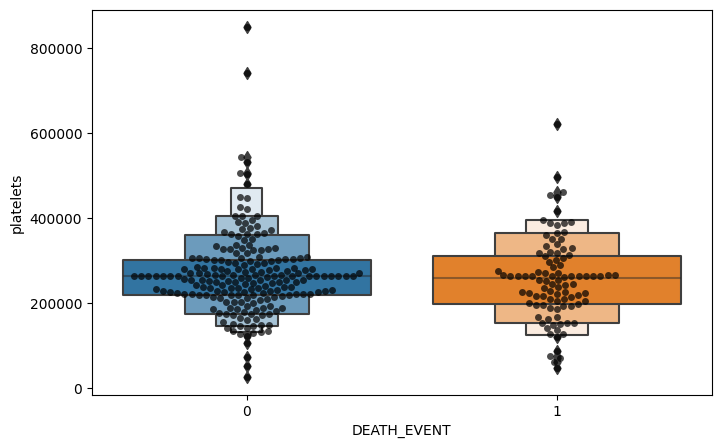

c:\Users\shazi\OneDrive\Desktop\developer academy\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


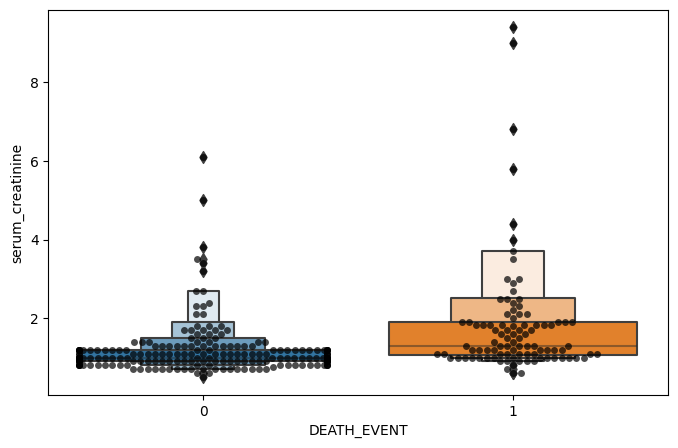

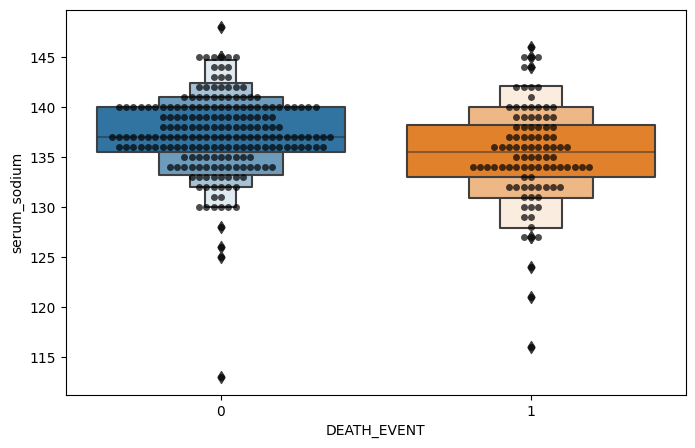

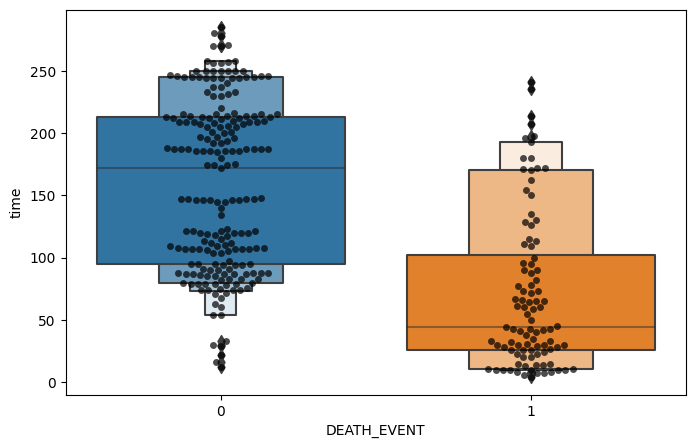

In [19]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(8,5))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.7)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i])
    plt.show()

Few Outliers can be seen in almost all the features
Considering the size of the dataset and relevancy of it, we won't be dropping such outliers in data preprocessing which wouldn't bring any statistical fluke.

DATA PREPROCESSING ### Defining independent and dependent attributes in training and test sets

In [20]:
X=data.drop(["DEATH_EVENT"],axis=1)
Y=data["DEATH_EVENT"]

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [22]:
# Using standard scaler as a standardization technique.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
##building model LOGISTIC REGRESSION
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

LogisticRegression()

In [25]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_LR})

,Actual,Predicted
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
136,0,0
228,0,1
205,0,0
52,1,1
108,0,0


In [26]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(Y_test, pred_LR)

## CONFUSION MATRIX
conf_mat_LR = confusion_matrix(Y_test, pred_LR)

print(accuracy_LR)
print(conf_mat_LR)


score_lr = round(accuracy_score(pred_LR,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

0.7833333333333333
[[36  1]
 [12 11]]
The accuracy score achieved using Logistic Regression is: 78.33 %


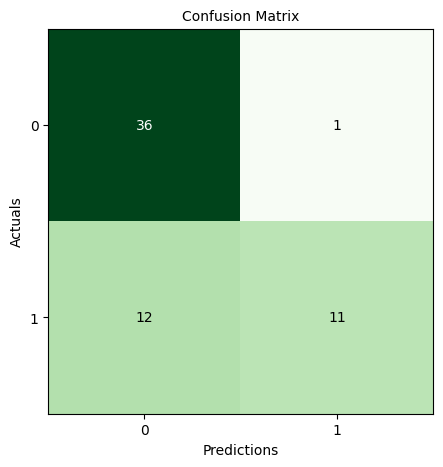

In [27]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat_LR, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

In [30]:
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
206,0,0
188,0,0
12,1,0
219,0,0
237,0,0
136,0,0
228,0,1
205,0,0
52,1,1
108,0,0


In [31]:
## Evaluate the naive bayes mYdel
accuracy_NB = accuracy_score(Y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(Y_test, y_pred_NB)

print(accuracy_NB)
print(conf_mat_NB)

score_NB = round(accuracy_score(y_pred_NB,Y_test)*100,2)

print("The accuracy score achieved using Gaussian NB is: "+str(score_NB)+" %")


0.6833333333333333
[[34  3]
 [16  7]]
The accuracy score achieved using Gaussian NB is: 68.33 %


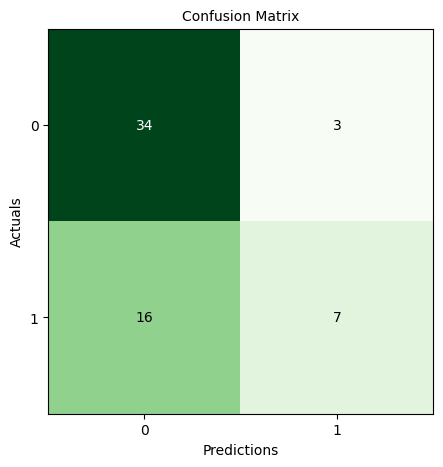

In [32]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat_NB, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [33]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf')

In [34]:
#Train the model using the training sets
clfLinear.fit(X_train, Y_train)
clfsigmoid.fit(X_train, Y_train)
clfrbf.fit(X_train, Y_train)

SVC()

In [35]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [36]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
136,0,0
228,0,0
205,0,0
52,1,1
108,0,0


In [37]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(Y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(Y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(Y_test, y_pred_rbf))

score_SVML = round(accuracy_score(y_pred_linear,Y_test)*100,2)
print("The accuracy score achieved using linear kernel is: "+str(score_SVML)+" %")
score_SVMS = round(accuracy_score(y_pred_sigmoid,Y_test)*100,2)
print("The accuracy score achieved using linear kernel is: "+str(score_SVMS)+" %")
score_SVMR = round(accuracy_score(y_pred_rbf,Y_test)*100,2)
print("The accuracy score achieved using linear kernel is: "+str(score_SVMR)+" %")


Linear Kernel Accuracy: 0.8
Sigmoid kernel Accuracy: 0.7833333333333333
rbf kernelAccuracy: 0.8
The accuracy score achieved using linear kernel is: 80.0 %
The accuracy score achieved using linear kernel is: 78.33 %
The accuracy score achieved using linear kernel is: 80.0 %


In [38]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(Y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(Y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(Y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[37  0]
 [12 11]]
[[36  1]
 [12 11]]
[[35  2]
 [10 13]]


<AxesSubplot: >

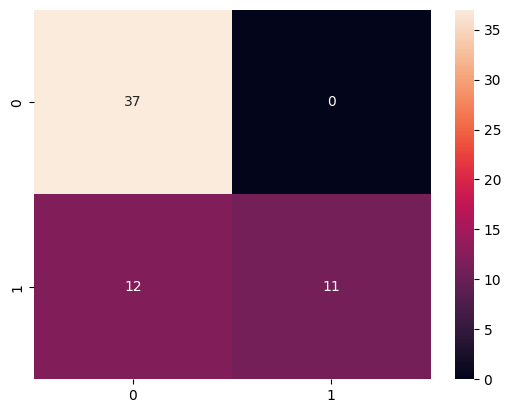

In [39]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [40]:
print(classification_report(Y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        37
           1       1.00      0.48      0.65        23

    accuracy                           0.80        60
   macro avg       0.88      0.74      0.75        60
weighted avg       0.85      0.80      0.78        60



In [41]:
auc = roc_auc_score(Y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.739130


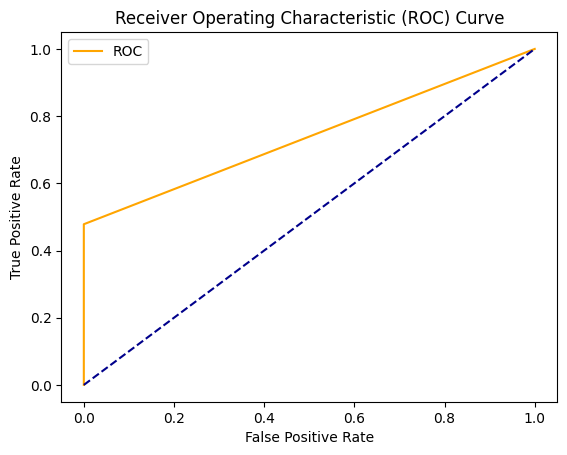

In [42]:
fpr, tpr = roc_curve(Y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [43]:
###NEURAL NETWORK


## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 16, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.25))
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.5))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])



In [44]:
## train the model
history = model.fit(X_train, Y_train, batch_size = 25, epochs = 300, validation_data=(X_test,Y_test))

Epoch 1/300
10/10 [==============================] - 2s 25ms/step - loss: 0.6922 - accuracy: 0.6695 - val_loss: 0.6920 - val_accuracy: 0.6167
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.6946 - val_loss: 0.6908 - val_accuracy: 0.6167
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.6946 - val_loss: 0.6898 - val_accuracy: 0.6167
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.6946 - val_loss: 0.6886 - val_accuracy: 0.6167
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.6946 - val_loss: 0.6873 - val_accuracy: 0.6167
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.6946 - val_loss: 0.6858 - val_accuracy: 0.6167
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.6946 - val_loss: 0.6837 - val_accuracy: 0.6167
Epoch 8/300


In [45]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 79.17%


In [46]:
## make prediction


y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.4)
np.set_printoptions()

2/2 [==============================] - 0s 8ms/step


In [47]:
## evaluate the model accurac
accuracy_NN = accuracy_score(Y_test, y_pred_ann)

## CONFUSION MATRIX
conf_mat = confusion_matrix(Y_test, y_pred_ann)

print(accuracy_NN)
print(conf_mat)


score_NN = round(accuracy_score(y_pred_ann,Y_test)*100,2)

print("The accuracy score achieved using Artificial Neural Network is: "+str(score_NN)+" %")



0.8166666666666667
[[33  4]
 [ 7 16]]
The accuracy score achieved using Artificial Neural Network is: 81.67 %


In [48]:
print(Y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [49]:
y_pred_ann = y_pred_ann.flatten()

In [50]:
print(Y_test.shape)
print(y_pred_ann.shape)

(60,)
(60,)


In [51]:
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_ann})


,Actual,Predicted
206,0,False
188,0,False
12,1,True
219,0,False
237,0,False
136,0,False
228,0,False
205,0,False
52,1,True
108,0,True


In [52]:
##classification report
print(classification_report(Y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.80      0.70      0.74        23

    accuracy                           0.82        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60



In [53]:
cm = confusion_matrix(Y_test, y_pred_ann)
cm

array([[33,  4],
       [ 7, 16]], dtype=int64)

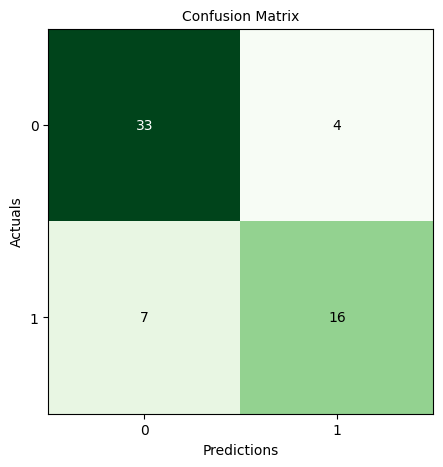

In [54]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [55]:
auc = roc_auc_score(Y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.793772


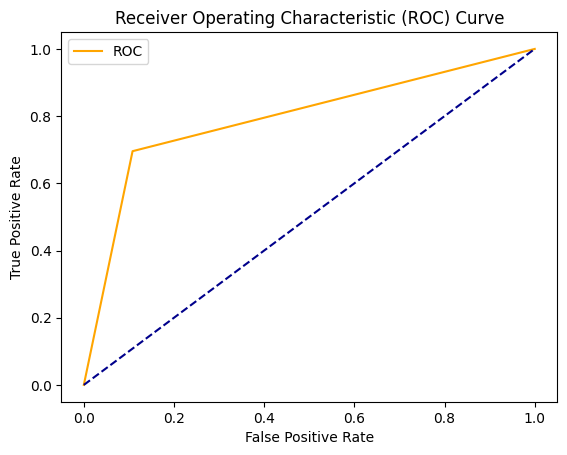

In [56]:
fpr, tpr = roc_curve(Y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

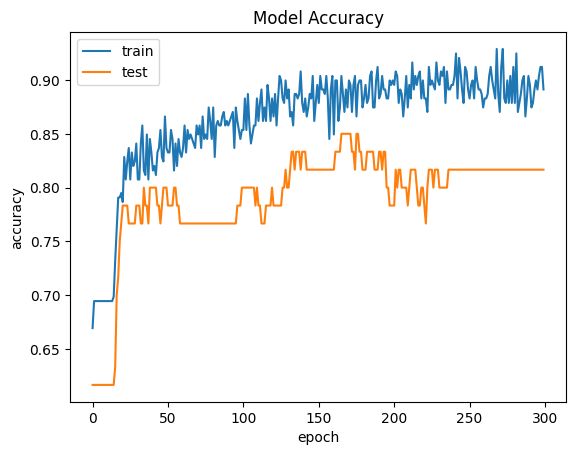

In [57]:

# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

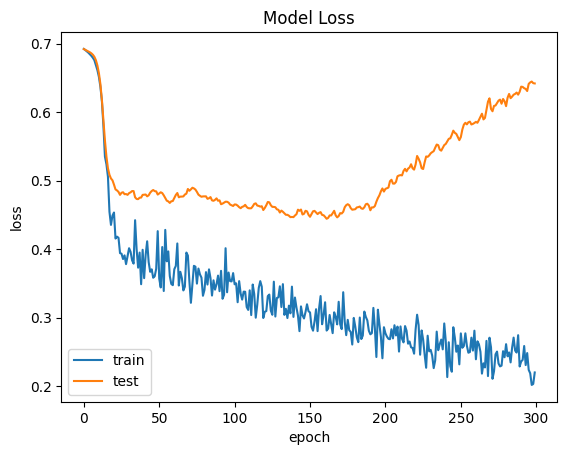

In [58]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [59]:
scores = [score_lr,score_NB,score_SVML,score_NN]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 78.33 %
The accuracy score achieved using Naive Bayes is: 68.33 %
The accuracy score achieved using Support Vector Machine is: 80.0 %
The accuracy score achieved using Neural Network is: 81.67 %


<AxesSubplot: title={'center': 'Accuracy Scores of different model'}, xlabel='Algorithms', ylabel='Accuracy score'>

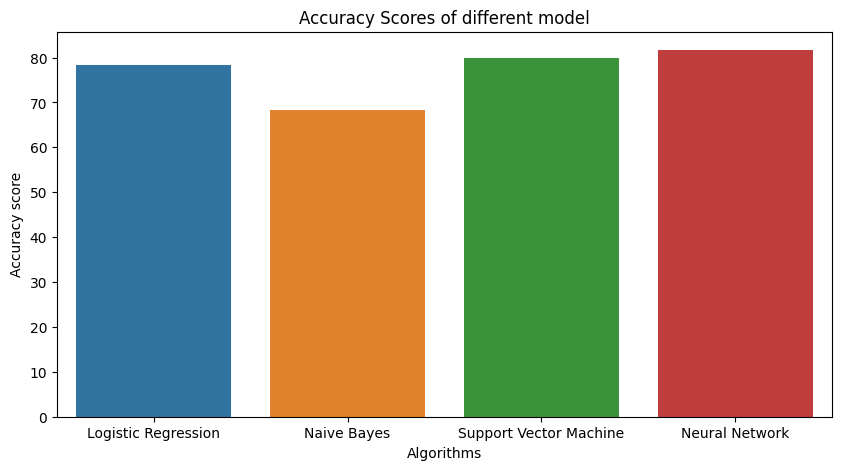

In [60]:
plt.figure(figsize=(10,5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('Accuracy Scores of different model')
sns.barplot(x= algorithms, y= scores)

In [61]:
model.save('model_NN')

INFO:tensorflow:Assets written to: model_NN\assets


INFO:tensorflow:Assets written to: model_NN\assets
